In [8]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Population and Job forecasting </div>

<div class="usecase-authors"><b>Authored by: Rhutuvaruni Kharade and Tharusha Chao</div>

<div class="usecase-duration"><b>Duration:</b> 100 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, PowerBI, Tableau</div>
</div>

<div class="usecase-section-header">Scenario</div>

<b>As a citizen and a job seeker, I want to find a job in the field that currently has a lot of demand in this area. </b>
Job seekers are often worried about which jobs are in high demand or in low demand? Which industry will have higher number of jobs in future ? Which areas have highest numbers of jobs based on a particular industry ? Its important for them to know which jobs they should study for and which city has highest concentration of such jobs so they can plan their living and stay in such areas. By understanding the number of jobs based on a cities, job seekers can ensure that they can get a job or live in close vicinity of that job if they live in a particular areas. 

<b>As a business owner I want to establish my business where there is a high demand for my service. I want to make sure that the city I am planning to establish my business in has a higher population so I can attract more customers and potential candidates to work for my company. </b>
Business owners need to know in which city they should establish their company in. This is based on the population of the area. Number of people living in a particular area can motivate business owners to have their business in such locations. This will also attract many job seekers in these places which will help the businesses find the right candidates (employees) to work for them. 



<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will - 
- Learn how to make open the data in the form of pandas dataframe and save it for futher use.
- Have learned how to clean, transform, analyze, visualize data and report outcomes (findings) effectively.
- Use the data to create effective visualization like scatterplots, heatmaps, histograms, etc to aid an understanding of the data to technical and non-technical readers
- using dashboards for effective story telling to both techical and non-technical audiences. 
- Using version control tools to collaborate and contribute to the project//


<div class="usecase-section-header">Introduction</div>

This project focuses on finding the relationship between jobs and population. Jobs in different industry impact the population in the area. This project will look at this impact and will also give reader a brief idea about how population changes with respect to the number of jobs in a particular area. The data is sourced from City of Melbourne Open Data which is open source and will be used throughout this project. The dataset will be cleaned, transformed, analyzed, visualized and finally relevant insights will be reported and documented. These findings will help stakeholders, policy makers and other readers for futher decision making.  


<div class="usecase-section-header">Datasets Used </div>

1 : city-of-melbourne-jobs-forecasts-by-small-area-2020-2040

2 : city-of-melbourne-population-forecasts-by-small-area-2020-2040

<div class="usecase-section-header">Learning Opportunities</div>

ADD

<div class="usecase-section-header">Importing libraries </div>

In [9]:
# importing libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import requests
import os 
import matplotlib.pyplot as plt 
#import missingno as msno



<div class="usecase-section-header">Connecting to Dataset and Testing </div>

In [10]:
# # aim : api stuff, creating requests and parsing json 
# # job data - City of Melbourne Jobs Forecasts by Small Area 2021-2041

# # Function to get data from website using API
# def get_data(base, data_url, offset=0):    
#     # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
#     filters = f'records?limit={50}&offset={offset}&timezone=UTC'
#     # Make the url from base, data url and filters variables stored ouside loop
#     url = f'{base}{data_url}/{filters}'
#     # Use the requests function to get the data
#     result = requests.get(url)
#     # Check that the request works, error code 200 = successful
#     if result.status_code == 200:
#         # Save results as a json file
#         result_json = result.json()
#         # Store a variable of max_results with total of dataset
#         max_results = result_json['total_count']
#         # Save the results key data to a list variable
#         records = result_json['results']
#     else:
#         # If data is not collected correctly return the error
#         print("ERROR GETTING DATA: ", result.status_code)
#         max_results = 0
#         records = []
#     # At end of function, return the json results in records, max_results count and offset
#     return [records, max_results, offset]


# # Collect data from API
# # Set offset increment
# OFFSET_INCREMENT = 50
# # Base url (this should be the same for all datasets)
# BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# # Set specific url 
# SPECIFIC_PATH = 'city-of-melbourne-jobs-forecasts-by-small-area-2020-2040'
# # Call the get data function, passing in variables above, save to result
# result = get_data(BASE_URL, SPECIFIC_PATH)
# # Save the records data returned in the get_data function to records list variable
# records = result[0]
# # Save the dataset size data returned in the get_data function to max_results variable
# max_results = result[1] 
# # Increase the offset returned in the get_data function (result[2]) by the offset increment
# offset = result[2] + OFFSET_INCREMENT
# # Check the length of the data returned and compare it against the max_results variable
# # If the length o fthe data is less than the max_results, run the while loop
# while len(records) != max_results:
#     # Call the get data function again, passing in url, specific path and new offset value
#     data = get_data(BASE_URL, SPECIFIC_PATH, offset)
#     # Add the data collected to the existing records list
#     records += data[0]
#     # Increase the offset by the offset increment
#     offset += OFFSET_INCREMENT
# # Convert the records list of dictionaries into a pandas dataframe 
# job = pd.DataFrame(records)
# job

In [11]:

# # Collect data from API
# # Set offset increment
# OFFSET_INCREMENT = 50
# # Base url (this should be the same for all datasets)
# BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# # Set specific url 
# SPECIFIC_PATH = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
# # Call the get data function, passing in variables above, save to result
# result = get_data(BASE_URL, SPECIFIC_PATH)
# # Save the records data returned in the get_data function to records list variable
# records = result[0]
# # Save the dataset size data returned in the get_data function to max_results variable
# max_results = result[1] 
# # Increase the offset returned in the get_data function (result[2]) by the offset increment
# offset = result[2] + OFFSET_INCREMENT
# # Check the length of the data returned and compare it against the max_results variable
# # If the length o fthe data is less than the max_results, run the while loop
# while len(records) != max_results:
#     # Call the get data function again, passing in url, specific path and new offset value
#     data = get_data(BASE_URL, SPECIFIC_PATH, offset)
#     # Add the data collected to the existing records list
#     records += data[0]
#     # Increase the offset by the offset increment
#     offset += OFFSET_INCREMENT
# # Convert the records list of dictionaries into a pandas dataframe 
# pop = pd.DataFrame(records)
# pop

In [12]:
#job = pd.read_csv("city-of-melbourne-jobs-forecasts-by-small-area-2020-2040.csv")
job = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-population-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
job

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0
...,...,...,...,...,...
17047,West Melbourne (Residential),2033,Not applicable,Total population,13657.0
17048,West Melbourne (Residential),2034,Not applicable,Total population,14250.0
17049,West Melbourne (Residential),2036,Not applicable,Total population,14832.0
17050,West Melbourne (Residential),2037,Not applicable,Total population,14854.0


In [13]:
job.head()

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0


In [14]:
# to get a basic understanding of variables and null values
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geography  17052 non-null  object 
 1   Year       17052 non-null  int64  
 2   Gender     17052 non-null  object 
 3   Age        17052 non-null  object 
 4   Value      16989 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.2+ KB


In [15]:
# To see total numbers of rows and columns 
job.shape

(17052, 5)

In [16]:
# Renaming columns for ease, making them all lowercase. 
job = job.rename(columns = {"Geography":"city", "Year":"year", "Category":"category", "Industry Space Use": "industry_space_use", "Value": "value"} )

In [17]:
# In geography columns, to see which unique location it consists of
job.city.unique()

array(['City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne',
       'Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)',
       'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra',
       'Southbank', 'West Melbourne (Industrial)',
       'West Melbourne (Residential)'], dtype=object)

In [18]:
# to check unique years this data is from
job.year.unique()

array([2021, 2023, 2026, 2028, 2034, 2037, 2038, 2024, 2025, 2040, 2031,
       2033, 2022, 2032, 2036, 2041, 2027, 2029, 2039, 2035, 2030],
      dtype=int64)

In [19]:
# to understand uniqe categories in category columns 
job.category.unique()

AttributeError: 'DataFrame' object has no attribute 'category'

In [ ]:
job.industry_space_use.unique()

<div class="usecase-section-header">About Jobs Forecast Dataset. </div>

This dataset provides jobs forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 9114 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>object</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>category:</b> This variables shows the category of the job that was created in that particular year. This is a numerical variable of type <b>object</b>. There are two categories in this variables however we will only look at category by industry.  </li><hr>
        <li>
            <b>industry_space_use:</b> This variables shows the space used by a particular industry that was established in given year. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the number of jobs created by a particular industry that was established in given year. This is a numerical variable of type <b>integer</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

In [ ]:
#pop = pd.read_csv("city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv")
pop = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-population-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
pop

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0
...,...,...,...,...,...
17047,West Melbourne (Residential),2033,Not applicable,Total population,13657.0
17048,West Melbourne (Residential),2034,Not applicable,Total population,14250.0
17049,West Melbourne (Residential),2036,Not applicable,Total population,14832.0
17050,West Melbourne (Residential),2037,Not applicable,Total population,14854.0


In [ ]:
pop.head()

In [ ]:
pop.info()

In [ ]:
pop.shape

In [ ]:
# Renaming columns for ease, making them all lowercase. 
pop = pop.rename(columns = {"Geography":"city", "Year":"year", "Gender":"gender", "Age": "age", "Value": "value"} )

In [ ]:
pop.city.unique()

In [ ]:
pop.gender.unique()

In [ ]:
pop.age.unique()

In [ ]:
pop.year.unique()

In [ ]:
pop

<div class="usecase-section-header">About Population Forecast Dataset. </div>

This dataset provides Population forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 17052 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>integer</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>gender:</b> This variables shows the gender of the person who is a part of the overall population. Gender is divided into four categories: Female, Male, Total and not applicable. This is a categorical nominal variable with type <b>object</b>  </li><hr>
        <li>
            <b>age:</b> This variables shows the age of a person who is a part of the population in this study. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the population of the area for a given year. This is a numerical variable of type <b>float</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

<div class="usecase-section-header">Checking and Handling missing values. </div>

<b>For population dataset</b>

In [ ]:
# To check if there is any missing values in any columns 
pop.isnull().any()

In [ ]:
# There are no null values in job dataset. However there is null (missing) values in population dataset in value column. 
# Lets find out how many null values are there in value column
print(pop.value.isnull().sum())

In [ ]:
# pop

In [ ]:
pop = pop.dropna(axis= "rows")

In [ ]:
pop.isnull().any()

<b>All missing values in "value" column of population dataset have been removed.  </b>

In [ ]:
# Choose all data where the gender is not applicable
pop = pop.set_index("gender")
other_pop = pop.loc[["Total", "Not applicable"],:]
other_pop                                         # saving total and not applicable data into differnet variable for further use. 
pop = pop.loc[["Female", "Male"],:]               # seperating male and female gender from the whole dataset
pop.reset_index(inplace=True)

In [ ]:
pop       # df where gender = ['Male', 'Female']

In [ ]:
other_pop    # df where all values from gender = ['total', 'not applicable']
other_pop.reset_index(drop=True)
other_pop

<b>The population dataset now only contains data where the gender is either female or male. Another dataframe has been created to save the data from gender whose value was "Not applicable" and "Total" for futher analysis. </b>

In [ ]:
job.isnull().any()

In [ ]:
job

<b>There are no missing values in job dataset hence we do not need to perfrom any operations to remove null or missing values. However the industry_space_use column has values where the industry is "Total jobs" which is not accurate so we will remove the rows where the column has such values and reserve it in a different variable for later analysis. </b>

In [ ]:
total_job_by_ind_space_use = job.set_index("industry_space_use").loc[['Total jobs'], : ]
job = job.set_index("industry_space_use").loc[['Accommodation', 'Admin and support services',
       'Agriculture and mining', 'Arts and recreation services',
       'Business services', 'Construction', 'Education and training',
       'Other services', 'Electricity, gas, water and waste services',
       'Finance and insurance', 'Food and beverage services',
       'Health care and social assistance',
       'Information media and telecommunications', 'Manufacturing',
       'Public administration and safety', 'Real estate services',
       'Rental and hiring services', 'Retail trade',
       'Transport, postal and storage', 'Wholesale trade',
       'Accommodation - Commercial', 'Education',
       'Entertainment - Hospitality', 'Entertainment - Other', 'Health',
       'Industrial', 'Office', 'Other - Employment', 'Retail'],:]
job

In [ ]:
total_job_by_ind_space_use

<b>Now we only have job data where each industry belongs to a speceific category and not "Total jobs" category. Howevrer, the data from "total jobs" category is saved as dataframe for futher analysis. </b>

In [ ]:
job.shape

In [ ]:
pop.shape

<div class="usecase-section-header">References</div>
<ul>
    <li> https://pandas.pydata.org/docs/reference/api/pandas.unique.html </li>
    <li>https://note.nkmk.me/en/python-pandas-nan-extract/#:~:text=You%20can%20use%20the%20isnull,a%20missing%20value%20or%20not.&text=isnull()%20is%20an%20alias,and%20both%20are%20used%20interchangeably.</li>
    <li>https://www.kaggle.com/code/malanep/finding-and-visualizing-missing-data-in-python</li>
    <li>https://libraries.io/pypi/missingno</li>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html</li>
    <li>https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra</li>

</ul>

<h3> Rhuth's Work Above </h3>
<h1>MAIN SECTION </h1> 
<h3> Tharusha's Work Below </h3>

In [ ]:
print(pop.columns)


Index(['gender', 'city', 'year', 'age', 'value'], dtype='object')


### Simple Visual of the Population against the Year with Color/ Hue corresponding to the male and female population

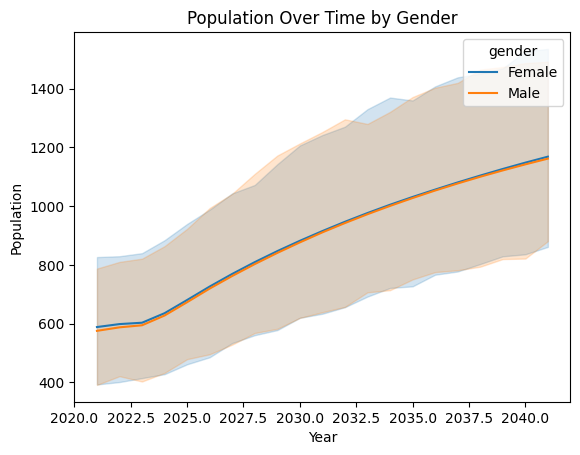

In [ ]:
#Visual

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(data=pop, x='year', y='value', hue='gender')
plt.title('Population Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

### Scatter Plot 

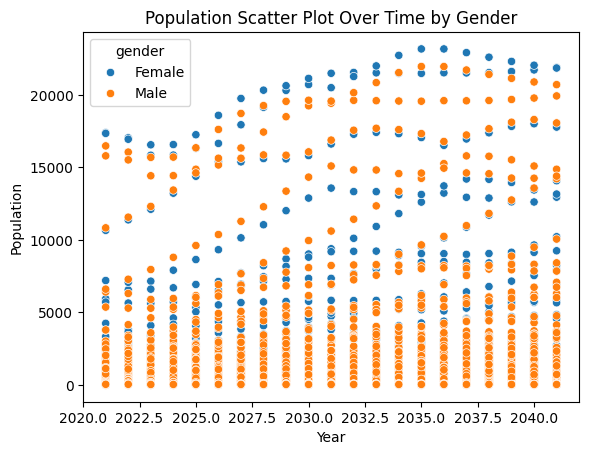

In [ ]:
sns.scatterplot(data=df, x='year', y='value', hue='gender')
plt.title('Population Scatter Plot Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()